## Welcome to my Notebook of Exploratory Data Analysis on Hotel Booking DataSet

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Librabries

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate # for displaying output in tabular structure
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv(r"C:\Users\viks\Desktop\Hotel Demand Forecasting\hotel_bookings.csv")


# 1. UnderStand the DataSet

In [4]:
df_copy = df # copying the dataset

### 1.1 DataSet Overview

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1.2 Initial Data Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

# Data Cleaning
### 2.1 Handling Duplicated and Missing Values


In [8]:
df.duplicated().value_counts()

False    87396
True     31994
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape
# so we deleted the duplicated rows

(87396, 32)

In [11]:
categorical_cols=list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns) - set(df.describe()))
# Preparing data for tabulation
table_data = []
for col in categorical_cols:
    unique_values = ', '.join(map(str, df[col].unique()))
    table_data.append([col, unique_values])

# Printing in tabular format
print(tabulate(table_data, headers=["Column", "Unique Values"], tablefmt="pretty"))

+----------------------+-----------------------------------------------------------------------------------------+
|        Column        |                                      Unique Values                                      |
+----------------------+-----------------------------------------------------------------------------------------+
|     deposit_type     |                           No Deposit, Refundable, Non Refund                            |
| distribution_channel |                        Direct, Corporate, TA/TO, Undefined, GDS                         |
|  assigned_room_type  |                           C, A, D, E, G, F, I, B, H, P, L, K                            |
|         meal         |                                BB, FB, HB, SC, Undefined                                |
|    market_segment    | Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation |
|        hotel         |                                Resort Hotel, City Hotel

In [12]:
df.isnull().sum().sort_values(ascending = False)[:3]

company    82137
agent      12193
country      452
dtype: int64

In [13]:
# Dealing with null-values
# 1. filling null values with 0 in company and agent column
df[['company','agent']] = df[['company','agent']].fillna(0)

# 2. filling null values with others in country
df['country'] = df['country'].fillna('others')

# 3. filling null values with mean of childrens
df['children'].fillna(df['children'].mean(), inplace = True)

In [14]:
df.isnull().sum().sort_values(ascending = False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.00000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.13864,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.45587,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.00000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 2.3 Data Type Conversion


In [16]:
# Convert 'reservation_status_date' column to datetime format,
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Convert the 'children', 'company', and 'agent' columns to integer type.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [17]:
len(df[df['adults'] +df['children'] +df['babies'] == 0])

df.drop(df[df['adults'] +df['children'] +df['babies'] == 0].index , inplace= True)

In [18]:
df['total people']= df['adults'] +df['children'] +df['babies']
df['total stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total people',
       'total stayed'],
      dtype='object')

In [49]:
dfSample = df.sample(5)
dfSample.to_csv('output.csv')

## now we have successfully cleaned the data and handled the null values

# Analytics for the DataSet

## Univariate Analysis
### Numerical Features

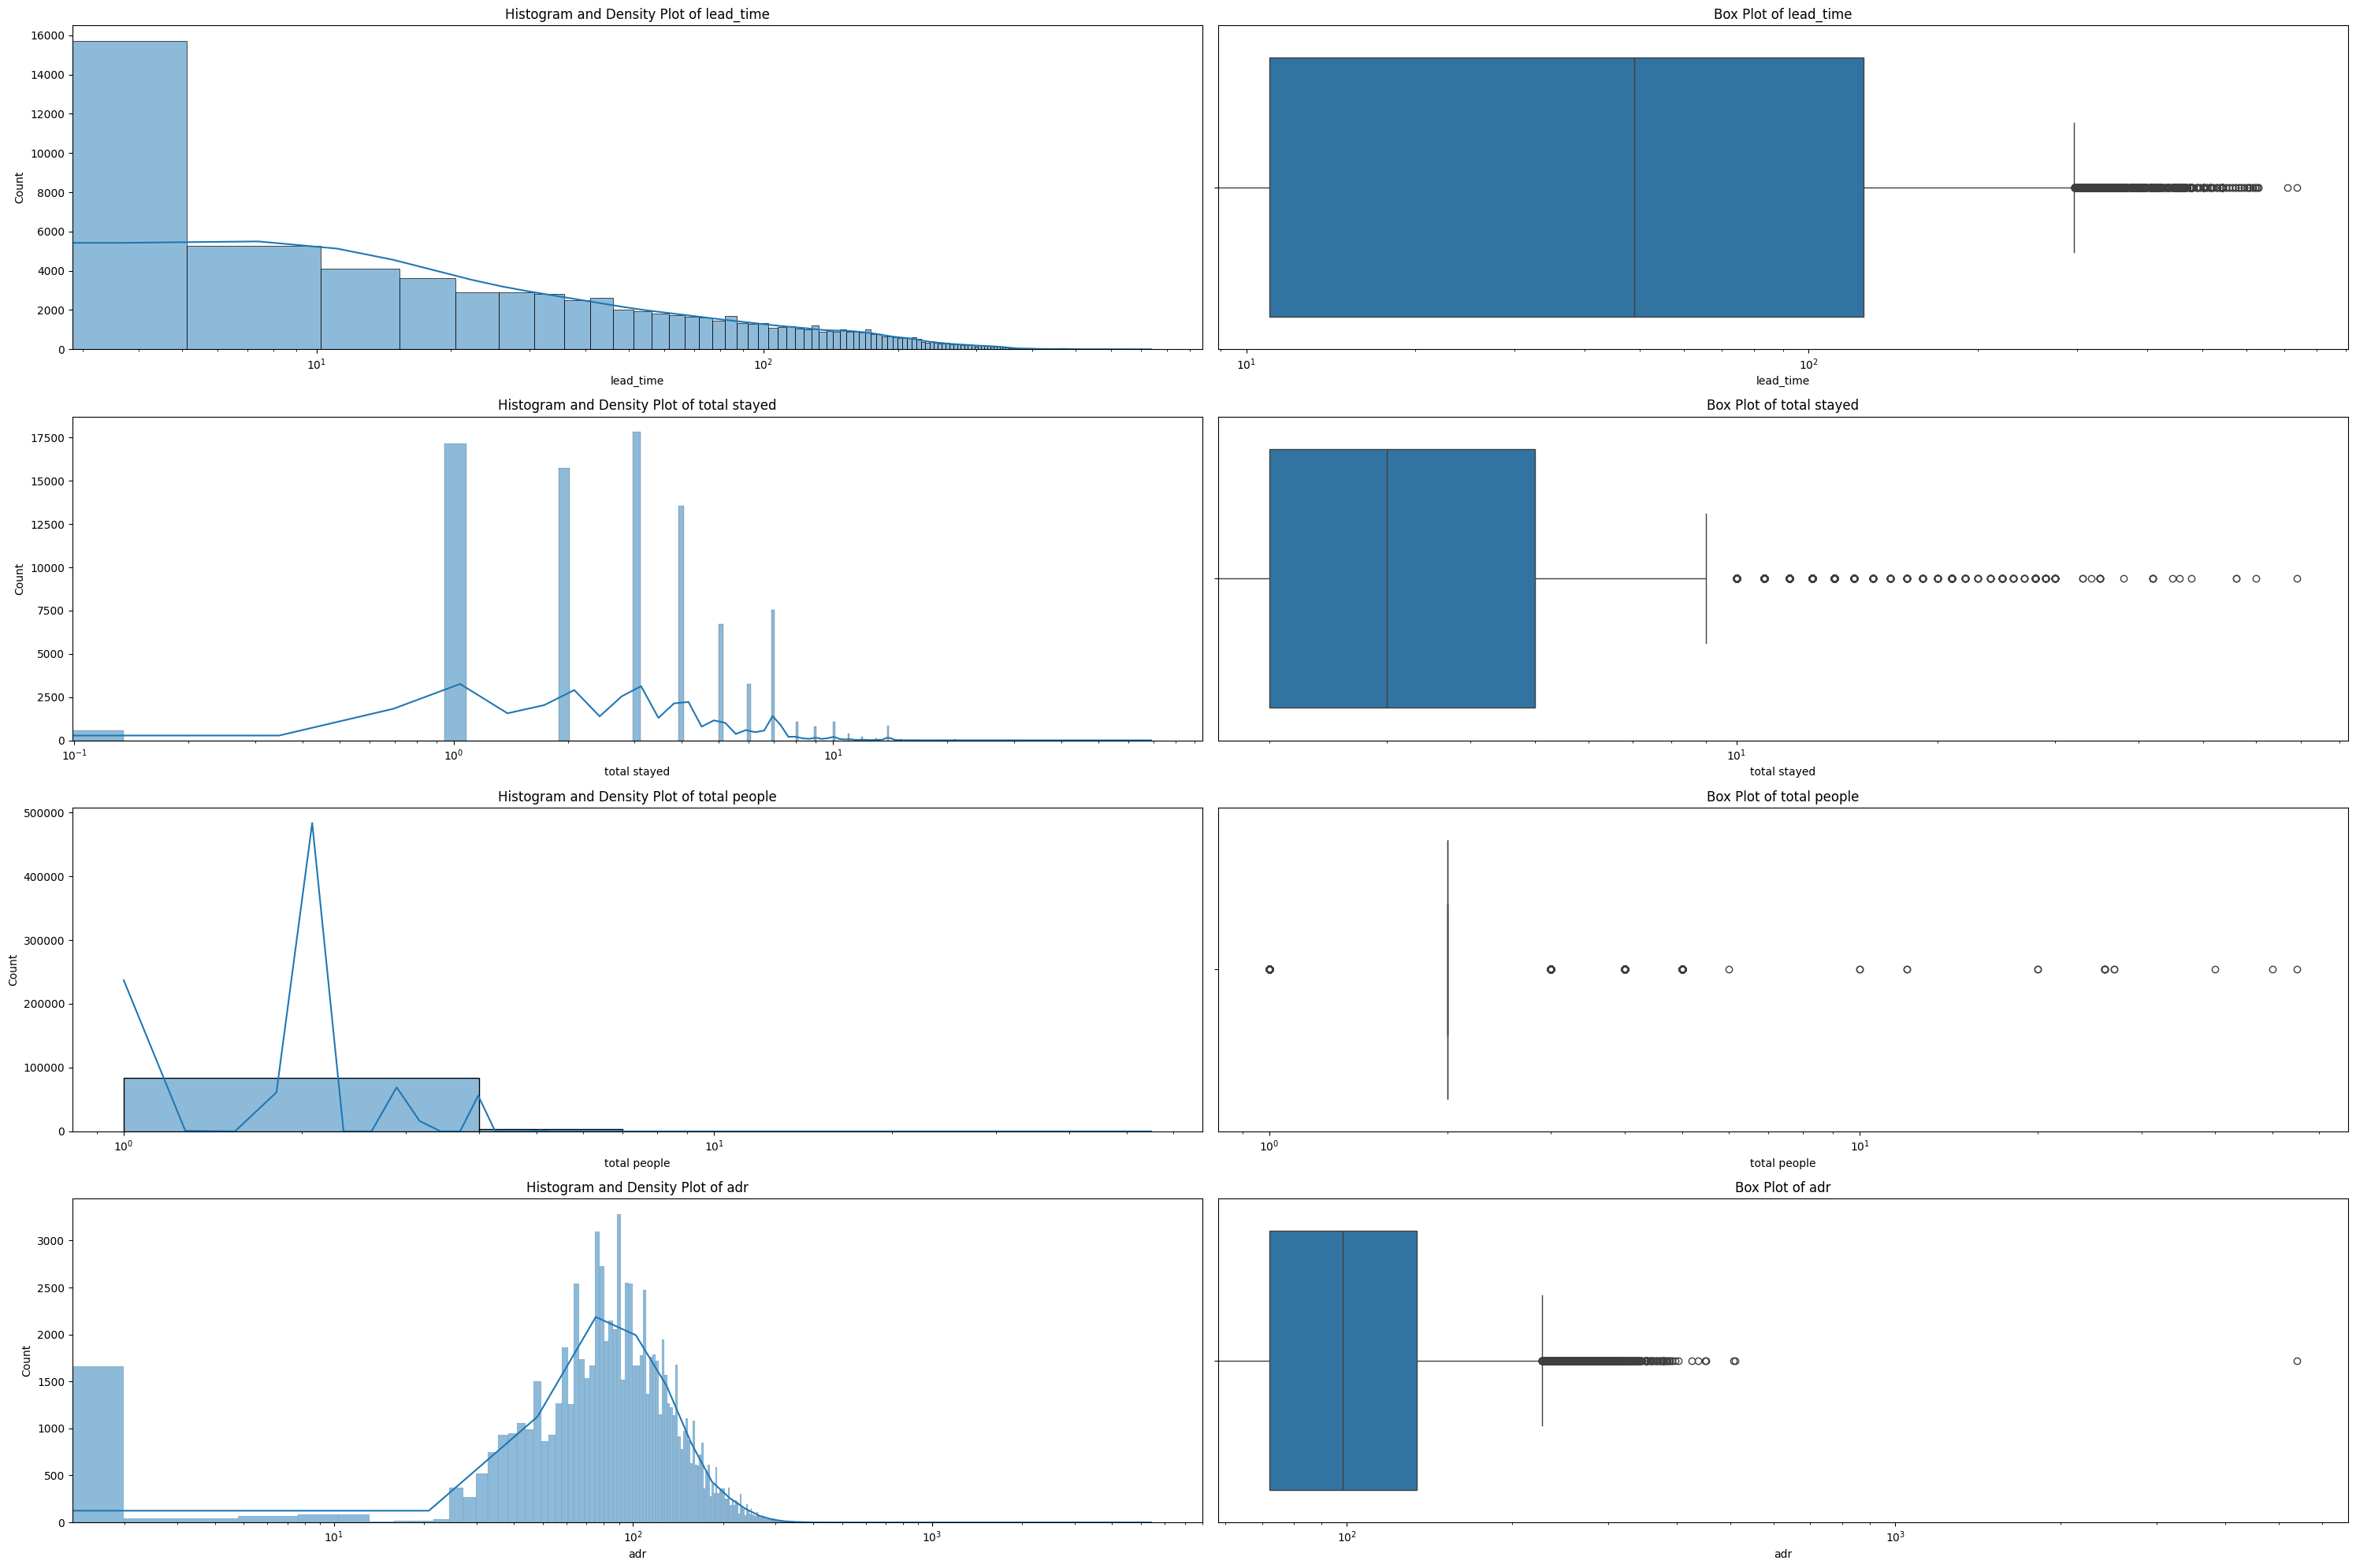

In [20]:
# Set up the matplotlib figure for numerical features
fig, axs = plt.subplots(4, 2, figsize=(30, 20))  # Adjust size as needed

# List of numerical columns
numerical_cols = ['lead_time', 'total stayed', 'total people', 'adr']  # Replace with your columns

# Plotting Numerical Features with Logarithmic x-axis
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram and Density Plot of {col}')
    axs[i, 0].set_xscale('log')  # Set x-axis to logarithmic scale

    sns.boxplot(x=df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Box Plot of {col}')
    axs[i, 1].set_xscale('log')  # Set x-axis to logarithmic scale


# Adjust layout
plt.tight_layout()
plt.show()

In [21]:

average_adr = df.groupby('hotel')['adr'].mean().reset_index()

# Print the average ADR values
print(average_adr)

# Plot the comparison using Plotly
fig = px.bar(average_adr, x='hotel', y='adr', color='hotel', 
             title='Comparison of (ADR) between City Hotel and Resort Hotel',
             labels={'adr': 'Average Daily Rate (ADR)', 'hotel': 'Hotel Type'},
             text=average_adr['adr'].round(2))

# Customize the layout including the graph size
fig.update_layout(
    showlegend=False,
    width=700,  # Set the width of the graph
    height=400, # Set the height of the graph
    title_x=0.2 # Center the title
)
fig.update_traces(textposition='inside')

# Show the plot
fig.show()


          hotel         adr
0    City Hotel  111.271969
1  Resort Hotel   99.059517


## Inference from the Numerical features:
    The numerical features are the ones that can be measured and quantified.
    These features are used to make predictions and inferences about the data.
    1.Lead time is right skewed and has lots of outliers
    2.Strangely there are many guest who have stayed more than 100 days in resorts
    3.family is size is majorly in the range of 2-6 
    4.the adr is kind of normally distributed with avg adr of 106 and max is 5400 
    5.the avg adr of city hotel is more than resort hotel
    
    

## 3.2 Categorical Features


In [22]:

# List of categorical columns
categorical_cols = ['market_segment', 'meal', 'customer_type', 'reserved_room_type']  # Replace with your columns

# Correctly align titles for bar and pie charts
titles = []
for col in categorical_cols:
    titles.append(f'{col} Bar Chart')
    titles.append(f'{col} Pie Chart')

# Create subplots for categorical features
fig_categorical = make_subplots(
    rows=len(categorical_cols), 
    cols=2, 
    specs=[[{'type': 'bar'}, {'type': 'pie'}]] * len(categorical_cols),  # Specify the types of plots
    subplot_titles=titles  # Correctly aligned titles
)

# Plotting Categorical Features
for i, col in enumerate(categorical_cols):
    # Bar Chart
    fig_categorical.add_trace(
        go.Bar(x=df[col].value_counts().index, y=df[col].value_counts().values, text=df[col].value_counts().values, textposition='auto'),
        row=i+1, col=1
    )
    
    # Pie Chart
    fig_categorical.add_trace(
        go.Pie(labels=df[col].value_counts().index, values=df[col].value_counts().values),
        row=i+1, col=2
    )

# Update layout for categorical plots
fig_categorical.update_layout(
    title_text="Univariate Analysis of Categorical Features",
    height=1500,  # Adjust the height as needed
    showlegend=False
)

fig_categorical.show()


## Inference from Categorical Columns
    1.About 59 percent of market segment is domintaed by online Travel Agency
    2.About 75 percent of total market segment is dominated by travel agency(Online + offline)
    3.more than 75 percent guest prefer BB meal 
    4.82 % of guest fall under transient Customer Type
    5.Room A (65%) and D(20%) are the most preffered room type by the cutsomers all over.
     

# Bivariate or Multivariate Analysis
### Which type of hotel is booked more?



In [23]:
hotels = df.groupby('hotel')
hotels.size()
hotels = pd.DataFrame(hotels.size(), columns=['count'])
hotels.reset_index(inplace=True)
hotels['percentage'] = hotels['count']*100/hotels['count'].sum()
hotels
px.bar(hotels,x= 'hotel',y ='percentage',color = 'hotel',text= 'count',width = 600,height=400 )


Customers mostly prefer city hotel.



### whether the hotel booked is cancelled or not ?


In [24]:
import pandas as pd

# Calculate the total number of bookings
total_bookings = len(df)

# Calculate the number of canceled bookings
canceled_bookings = df['is_canceled'].sum()

# Calculate the churn rate
churn_rate = (canceled_bookings / total_bookings) * 100

# Print the churn rate
print(f"The churn rate is {churn_rate:.2f}%")


The churn rate is 27.52%


In [25]:
hotel_cancelled = df.groupby('is_canceled')
hotel_cancelled.size()
hotel_cancelled = pd.DataFrame(hotel_cancelled.size(), columns=['count'])
hotel_cancelled.reset_index(inplace=True)
hotel_cancelled['percentage'] = hotel_cancelled['count']*100/hotels['count'].sum()
hotel_cancelled
px.bar(hotel_cancelled,x= 'is_canceled',y ='percentage',color = 'is_canceled',text= 'count',width = 600,height=400 )

about 27 percent of the bookings are being cancelled out of all booked hotels.


# Column Arrival Date Year

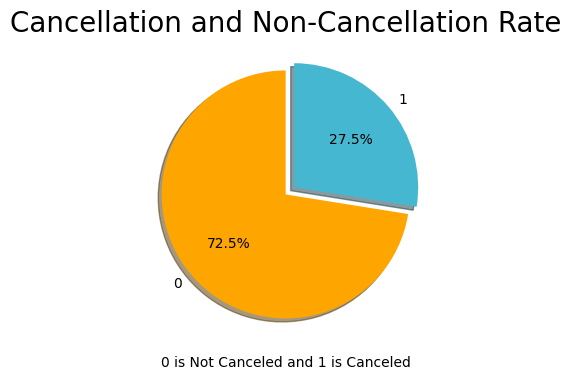

In [26]:
# Define a custom color palette
colors = ['#FFA500', '#45B7D1']

# Plotting pie chart
explode = [0.0, 0.09]  # Explode values for each slice
df['is_canceled'].value_counts().plot.pie(
    explode=explode,           # Explode the slices for emphasis
    startangle=90,             # Start angle for the pie chart
    autopct='%1.1f%%',         # Display percentage values with one decimal place
    shadow=True,               # Add shadow to the pie chart
    figsize=(4, 6),            # Specify the figure size
    fontsize=10,               # Font size for text
    colors=colors,              # Use custom colors
    
)

# Add title and labels
plt.title('Cancellation and Non-Cancellation Rate', fontsize=20 )  # Set title with larger font size
plt.xlabel('0 is Not Canceled and 1 is Canceled')  # Set label for x-axis
plt.ylabel('')  # Remove label for y-axis

# Display the pie chart
plt.show()

In [27]:
hotel_month = df.groupby(['arrival_date_year','arrival_date_month'])
hotel_month.size()
hotel_month = pd.DataFrame(hotel_month.size(), columns=['count'])
hotel_month.reset_index(inplace=True)
hotel_month['percentage'] = hotel_month['count']*100/hotels['count'].sum()
hotel_month
px.bar(hotel_month,x='arrival_date_month',y = 'count',color='arrival_date_year',text= 'arrival_date_year',width = 800,height=500 )

In [28]:
guest = df['country'].value_counts().reset_index()
guest = guest.head(10)
print(guest)
fig =px.pie(guest,names='country',values='count',title="Number of Guests visited in top 10 countries",color='country')
fig.show()

  country  count
0     PRT  27355
1     GBR  10424
2     FRA   8823
3     ESP   7244
4     DEU   5385
5     ITA   3061
6     IRL   3015
7     BEL   2081
8     BRA   1993
9     NLD   1910


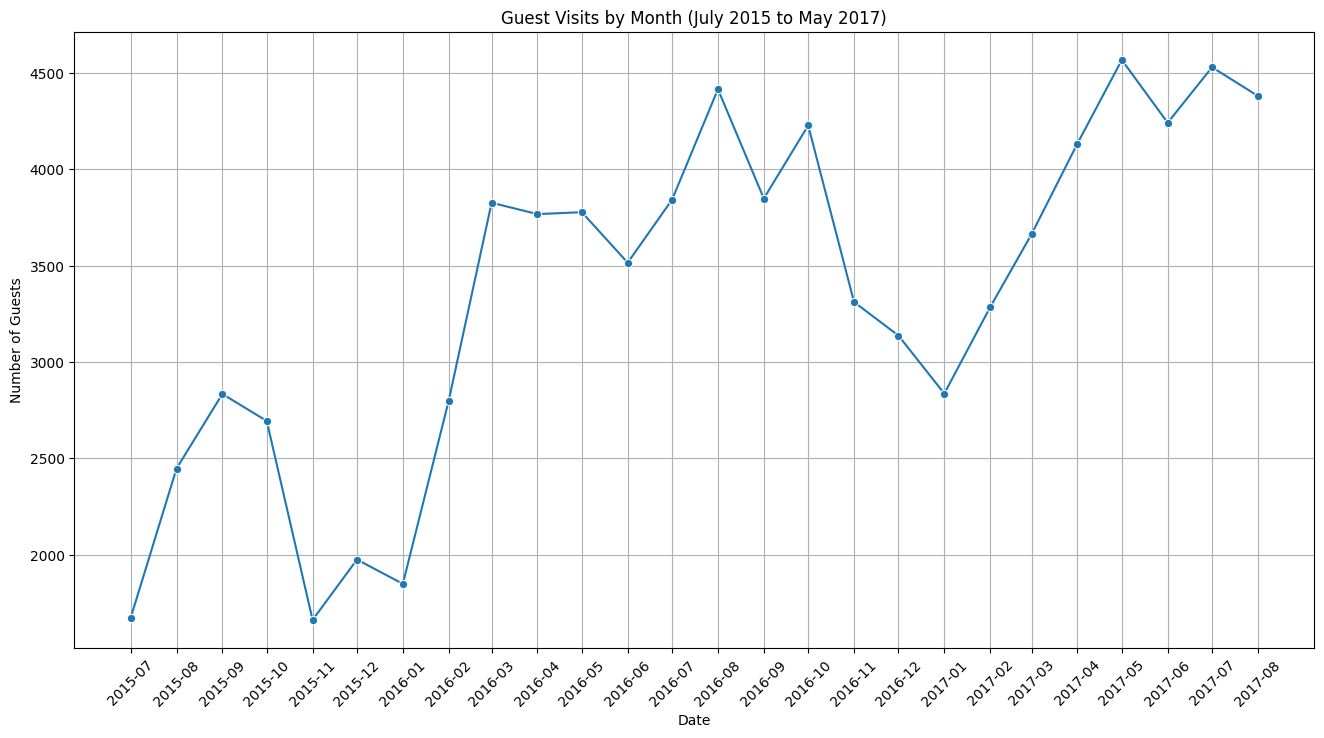

In [29]:


# Combine 'arrival_date_year' and 'arrival_date_month' into a single datetime-like column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-01')

# Create a date range from July 2015 to May 2017
all_dates = pd.date_range(start='2015-07-01', end='2017-08-31', freq='MS')

# Group by 'arrival_date' and count the number of guests
duo = df.groupby('arrival_date').size().reindex(all_dates, fill_value=0).reset_index(name='count')
duo.rename(columns={'index': 'arrival_date'}, inplace=True)

# Set the figure size before plotting
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed

# Creating the line plot
sns.lineplot(data=duo, x='arrival_date', y='count', marker='o',palette="pastel")

# Customizing the plot
plt.title('Guest Visits by Month (July 2015 to May 2017)')
plt.xlabel('Date')
plt.ylabel('Number of Guests')
plt.grid(True)
plt.xticks(ticks=all_dates, labels=all_dates.strftime('%Y-%m'), rotation=45,  # This adds the border
    )  # Set x-axis labels to show all months

plt.show()


In [30]:
duo = df.groupby(['arrival_date_year','arrival_date_month'])
duo.size()
duo = pd.DataFrame(duo.size(),columns=['count']).reset_index()
duo.sort_values(by='count',ascending=False).head(6)


,arrival_date_year,arrival_date_month,count
25,2017,May,4567
22,2017,July,4529
7,2016,August,4415
19,2017,August,4380
23,2017,June,4241
16,2016,October,4227


So these 6 months have the highest number of customers and the hotels should plan according to this demand 

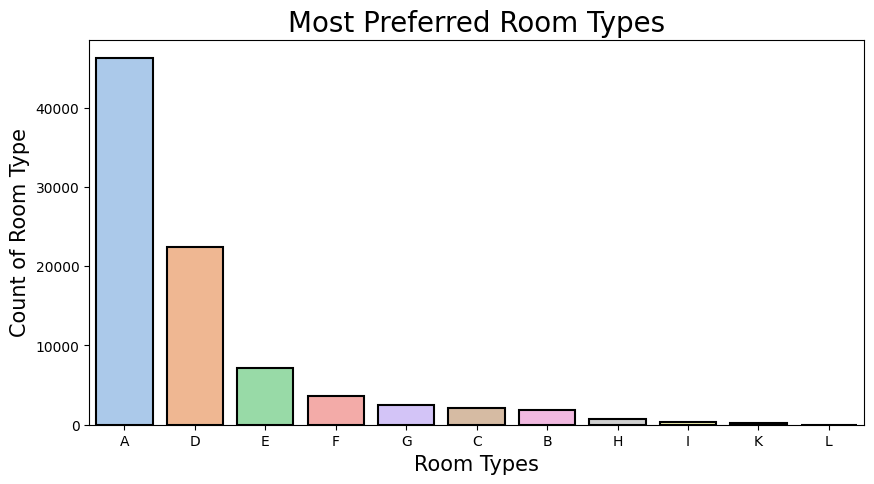

In [31]:
 # Plotting count of room types in a seaborn countplot
plt.figure(figsize=(10, 5))
sns.countplot(x=df['assigned_room_type'], order=df['assigned_room_type'].value_counts().index,palette="pastel",edgecolor="black",  linewidth=1.5)

# Adding labels and title with appropriate font sizes
plt.ylabel('Count of Room Type', fontsize=15)
plt.xlabel('Room Types', fontsize=15)
plt.title('Most Preferred Room Types', fontsize=20)
plt.show()

In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total people',
       'total stayed', 'arrival_date'],
      dtype='object')

     agent  num_of_bookings
9        9            28721
174    240            13028
14      14             3342
7        7             3294
183    250             2779
175    241             1644
27      28             1493
8        8             1383
1        1             1228
6        6             1117


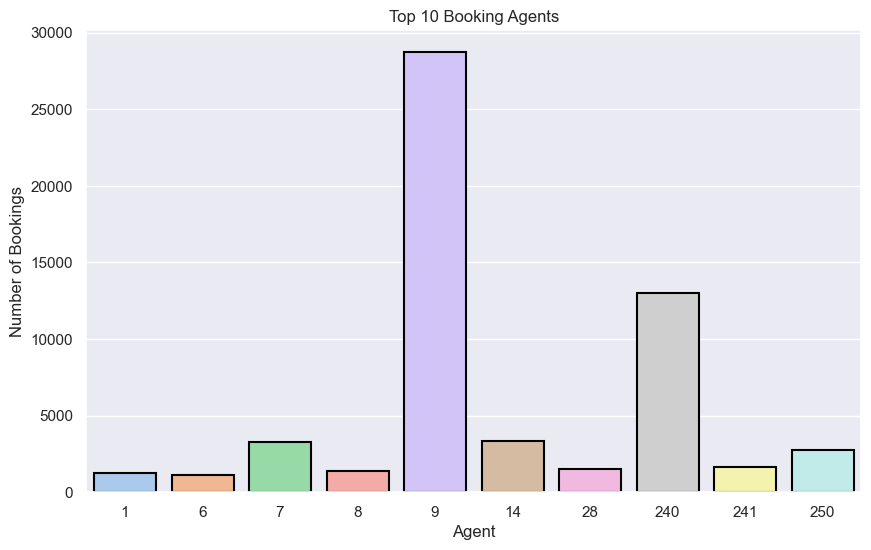

In [33]:
best_agent = df.groupby('agent').size().reset_index(name='num_of_bookings')
best_agent.sort_values(by='num_of_bookings', ascending=False, inplace=True)
best_agent = best_agent[best_agent['agent'] != 0]
top_booking_agent = best_agent.head(10)
print(top_booking_agent)

# Plotting with borders
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_booking_agent['agent'], 
    y=top_booking_agent['num_of_bookings'],
    palette="pastel",
    edgecolor="black",  # This adds the border
    linewidth=1.5       # This sets the border thickness
)
plt.title('Top 10 Booking Agents')
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.show()


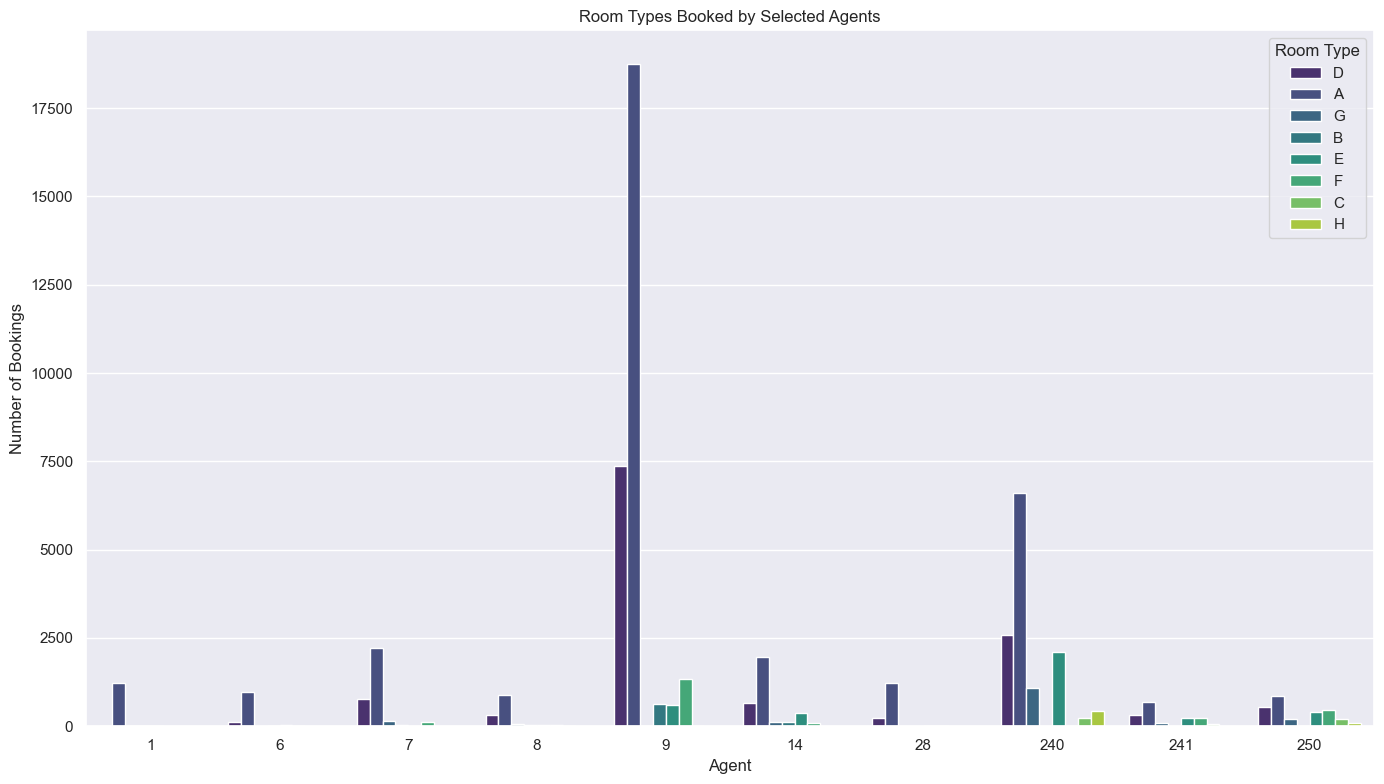

In [34]:


# List of agents to consider
agents = [1, 6, 7, 8, 9, 14, 28, 240, 241, 250]

# Filter the DataFrame for the specified agents
filtered_df = df[df['agent'].isin(agents)]

# Create a count plot using Seaborn
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='agent', hue='reserved_room_type', palette='viridis')

# Set plot titles and labels
plt.title('Room Types Booked by Selected Agents')
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')

# Show legend
plt.legend(title='Room Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


alone agent A has booked more than 18000 rooms of type A 

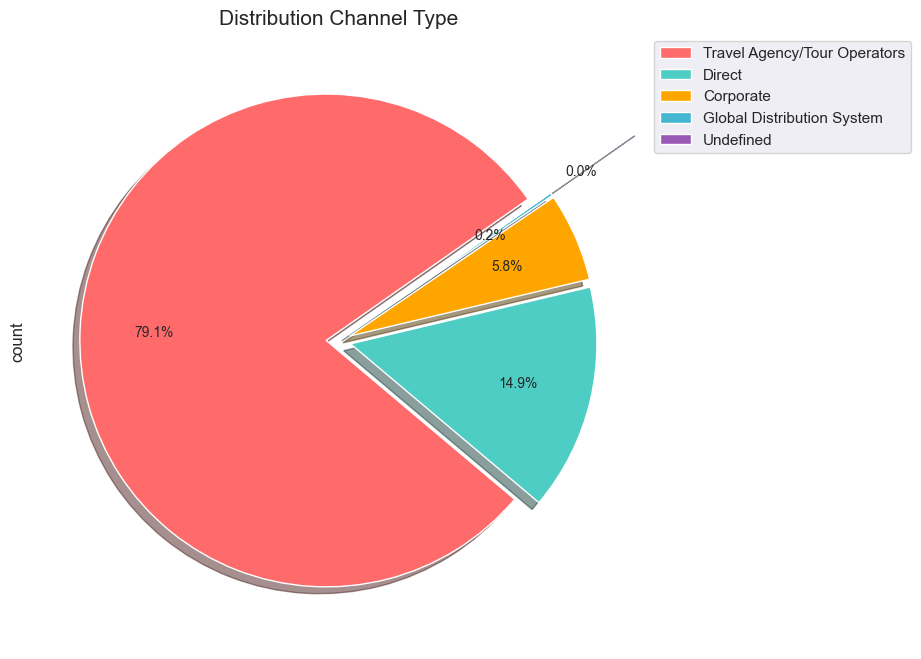

In [35]:
# Calculate value counts for distribution channels
distribution_type = df['distribution_channel'].value_counts()

# Define a custom color palette
colors = ['#FF6B6B', '#4ECDC4', '#FFA500', '#45B7D1', '#9B59B6']

# Defining explode values and labels
myexplode = [0.05, 0.05, 0.05, 0.05, 0.5]
labels = ['Travel Agency/Tour Operators', 'Direct', 'Corporate', 'Global Distribution System', 'Undefined']

# Plotting pie chart with customizations
distribution_type.plot.pie(
    figsize=(8, 8),              # Specify the figure size
    fontsize=10,                 # Font size for text
    shadow=True,                 # Add shadow to the pie chart
    explode=myexplode,           # Explode the slices for emphasis
    autopct='%1.1f%%',           # Display percentage values with one decimal place
    pctdistance=0.7,             # Distance from center for percentage text
    labels=None,                 # Don't display default labels
    startangle=35,               # Start angle for the pie chart
    colors=colors                # Use custom colors
)

# Adding title and legend
plt.title('Distribution Channel Type', fontsize=15)  
plt.legend(bbox_to_anchor=(1, 1), labels=labels, loc='upper left') 

# Displaying the pie chart
plt.show()

since about 80% of the bookings are the from Travel agency and Tour operator a good collaboration with these agencies can help business to grow

In [36]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total people',
       'total stayed', 'arrival_date'],
      dtype='object')

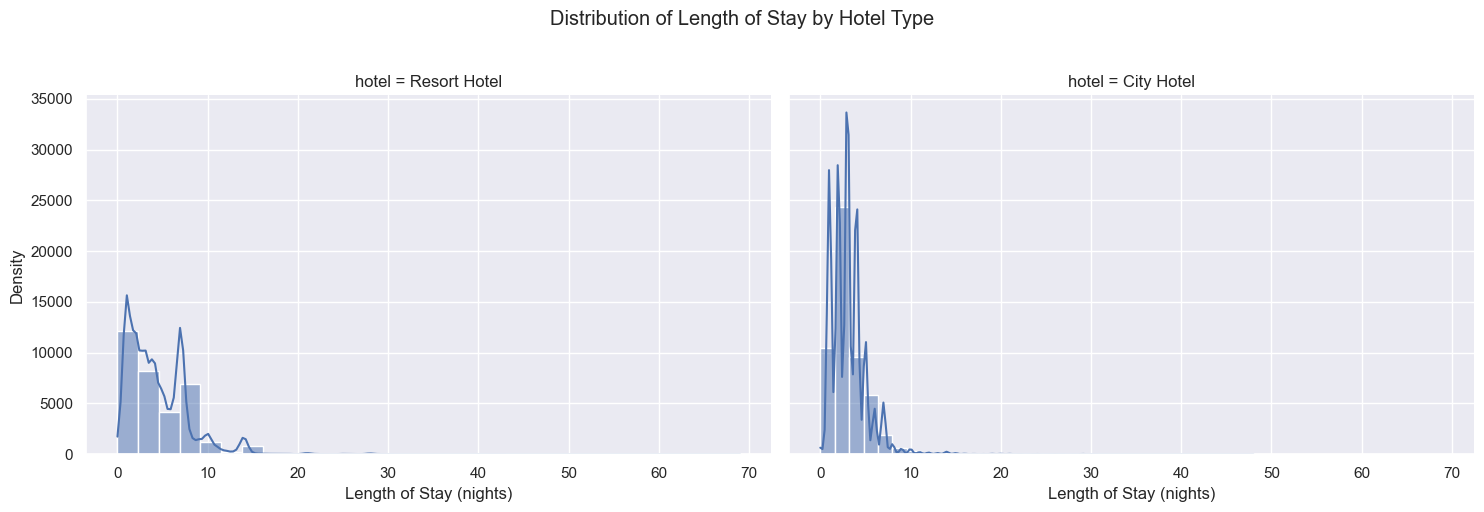

In [37]:
# Set up the FacetGrid in Seaborn
g = sns.FacetGrid(df, col="hotel", height=5, aspect=1.5)
# Map the histogram with KDE plot
g.map(sns.histplot, "total stayed", kde=True, bins=30)
# Set axis labels and titles
g.set_axis_labels("Length of Stay (nights)", "Density")
g.fig.suptitle('Distribution of Length of Stay by Hotel Type', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()


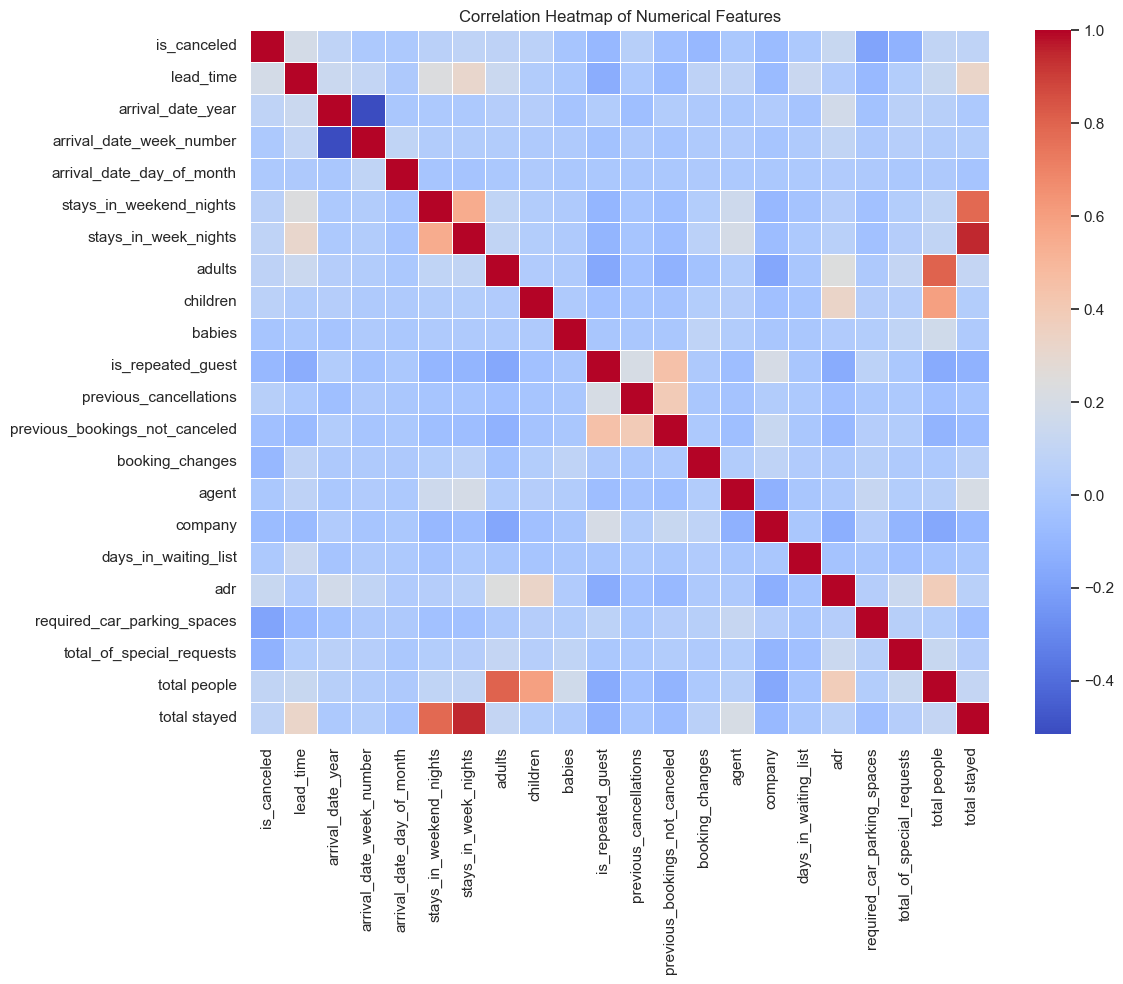

In [38]:


# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

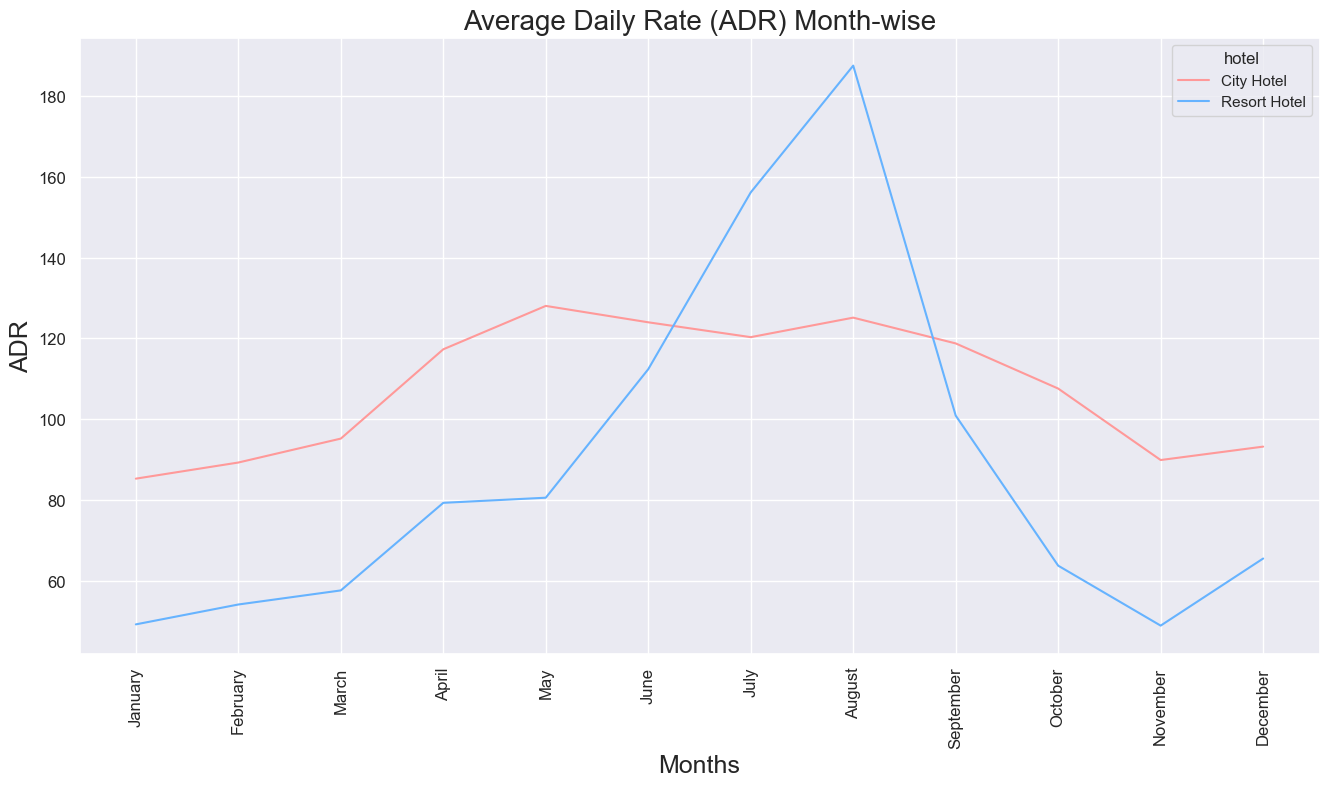

In [39]:
ADR_by_month = df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index().rename(columns= {'Counts': 'Hotel Type' , 'arrival_date_month': 
                                                                                                       'Months'})
# list of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# sorting dataframe by months
ADR_by_month['Months'] = pd.Categorical(ADR_by_month['Months'], categories = months, ordered = True )
# Custom colors for each hotel type
colors = ['#ff9999', '#66b3ff']

# Plotting the graph with seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(x=ADR_by_month['Months'], y=ADR_by_month['adr'], hue=ADR_by_month['hotel'], palette=colors)

# Adding labels and title
plt.title('Average Daily Rate (ADR) Month-wise', fontsize=20)
plt.xlabel('Months', fontsize=18)
plt.ylabel('ADR', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Displaying the plot
plt.show()

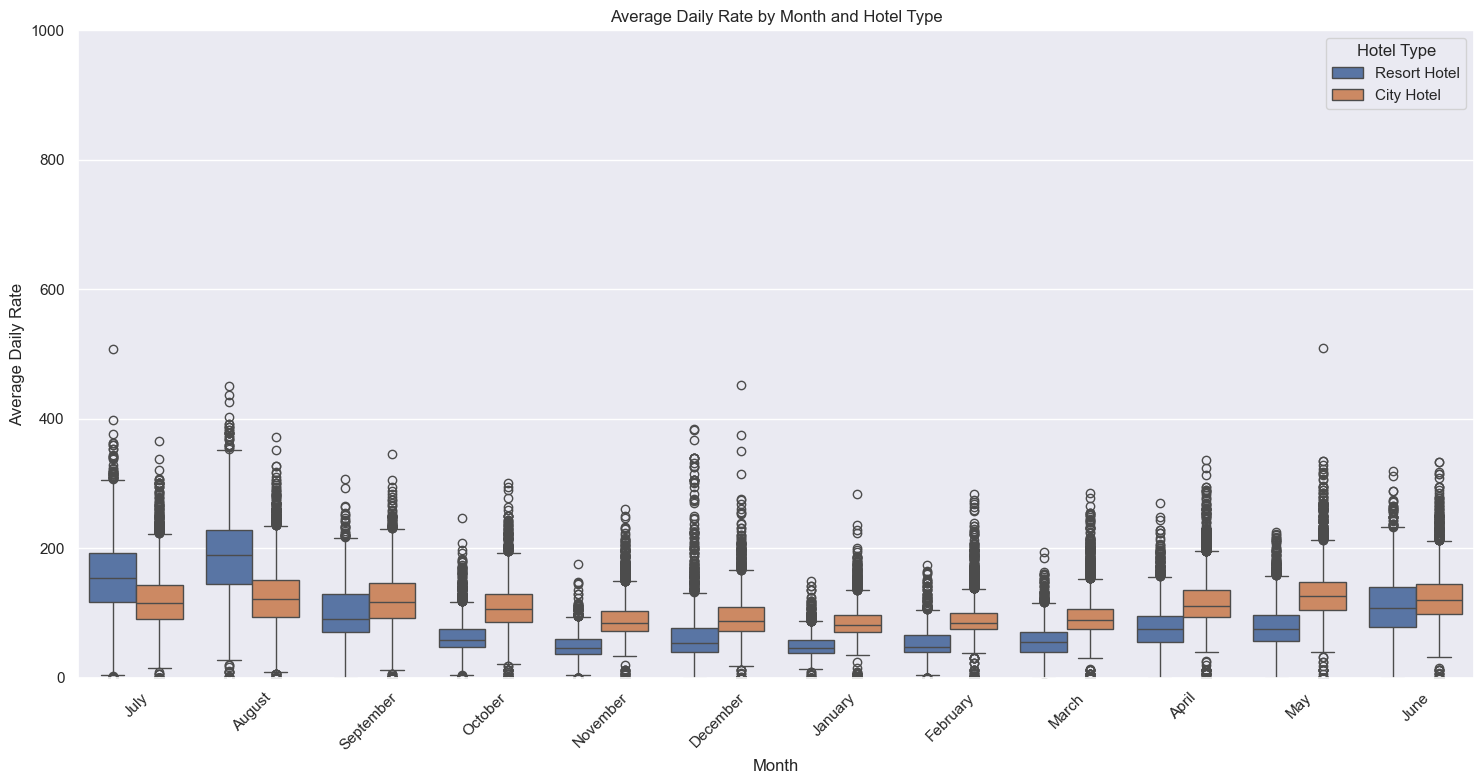

In [40]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['month'] = df['arrival_date'].dt.month_name()

plt.figure(figsize=(15, 8))
sns.boxplot(x='month', y='adr', hue='hotel', data=df)
plt.title('Average Daily Rate by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.ylim(0,1000)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

In [41]:

channel_segment = pd.crosstab(df['market_segment'], df['distribution_channel'], normalize='index')

# Initialize a figure
fig = go.Figure()

# Loop through each distribution channel to add to the plot
for dist_channel in channel_segment.columns:
    fig.add_trace(go.Bar(
        x=channel_segment.index,
        y=channel_segment[dist_channel],
        name=dist_channel
    ))

# Update layout for stacked bars
fig.update_layout(
    barmode='stack',
    title='Distribution Channels by Market Segment',
    xaxis=dict(title='Market Segment'),
    yaxis=dict(title='Proportion'),
    legend_title='Distribution Channel',
    height=400,  # Adjust height as needed
    width=800,  # Adjust width as needed
)

# Show the plot
fig.show()


In [42]:
# Create a scatter plot using Plotly
fig = px.scatter(df, x='previous_cancellations', y='is_repeated_guest',
                 color='is_repeated_guest',
                 labels={'previous_cancellations': 'Number of Previous Cancellations', 
                         'is_repeated_guest': 'Repeated Guest (0 = No, 1 = Yes)'},
                 title='Previous Cancellations vs. Repeated Guests')
# Update layout for better appearance
fig.update_layout(
    width=800,  # Set the width of the graph
    height=500, # Set the height of the graph
    title_x=0.5 # Center the title
)

# Show the plot
fig.show()




# Conclusion

    1.family is size is majorly in the range of 2-6 
    2.the adr is kind of normally distributed with avg adr of 106 and max is 5400
    3.the avg adr of city hotel is more than resort hotel
    4.About 59 percent of market segment is domintaed by online Travel Agency
    5.About 75 percent of total market segment is dominated by travel agency(Online + offline)
    6.more than 75 percent guest prefer BB meal 
    7.82 % of guest fall under transient Customer Type
    8.Room A (65%) and D(20%) are the most preffered room type by the cutsomers all over.
    9.Customers generally prefer city hotel
    10.The churn rate or cancellation rate is about 27 pecent 
    11.August and july have the mlst customers visiting the hotel
    12.The highest visited country is PRT, GBR , FRA and are in the months from may to october
    13.The most preferred room types are A, D.
    14.The best performing agent is agent 9.
    15.About 79 percent of the distribution channel is dominated by travel agency and Tour Operator
    16.The highest ADR is in month of August
    17.there are many outliers in ADR in the month of Dec and very high outliers in august
    
    